In [1]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) =boston_housing.load_data()

57344/57026 [==============================] - 0s 2us/step


In [3]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [7]:
train_targets[0]

15.2

In [4]:
print(f"Train_data shape:{train_data.shape}")
print(f"Train_lable shape:{train_targets.shape}")
print(f"Test Data shape:{test_data.shape}")
print(f"Test Labels shape:{test_targets.shape}")

Train_data shape:(404, 13)
Train_lable shape:(404,)
Test Data shape:(102, 13)
Test Labels shape:(102,)


In [5]:
#Normalizing the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

Note that the quantities used for normalizing the test data are computed using the training data. We should never use in your workflow any quantity computed on the test data, even for something as simple as data normalization.

In [6]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [8]:
#Model definition
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

We will use a very small network with two hidden layers, each with 64 units. In general, the less training data you have, the worse overfitting
will be, and using a small network is one way to mitigate overfitting

The network ends with a single unit and no activation (it will be a linear layer). This is
a typical setup for scalar regression (a regression where you’re trying to predict a single
continuous value).

In [22]:
#K-fold validation
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_scores = []

In [23]:
for i in range(k):
    print('processing fold #', i)
    #Prepares the validation data: data from partition #k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    #Prepares the training data:data from all other partitions
    partial_train_data = np.concatenate( [train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
    #Builds the Keras model(already compiled)
    model = build_model()
    #Trains the model(in silent mode,verbose = 0)
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
    #Evaluates the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    print(f"MAE Score on validation set:{val_mae}")
    print(f"MSE Score on validation set:{val_mse}")
    all_scores.append(val_mae)

processing fold # 0
MAE Score on validation set:2.475849151611328
MSE Score on validation set:10.985074996948242
processing fold # 1
MAE Score on validation set:2.8262112140655518
MSE Score on validation set:22.03023910522461
processing fold # 2
MAE Score on validation set:2.669490098953247
MSE Score on validation set:14.375411033630371
processing fold # 3
MAE Score on validation set:2.521043300628662
MSE Score on validation set:12.47089672088623


In [24]:
all_scores

[2.475849151611328, 2.8262112140655518, 2.669490098953247, 2.521043300628662]

In [11]:
all_scores

[2.0994272232055664, 2.386353015899658, 2.630561351776123, 2.4794669151306152]

In [25]:
np.mean(all_scores)

2.6231484413146973

In [35]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=1, verbose=0)
    
    mae_history = history.history['loss']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [43]:
#Building the history of successive mean K-fold validation scores

#compute the average of the per-epoch MAE scores for all folds. 
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_history


[211.6611099243164,
 30.694196224212646,
 21.70626211166382,
 17.5630624294281,
 15.57408356666565,
 14.155600786209106,
 13.190621376037598,
 12.534395456314087,
 11.975336074829102,
 11.224040746688843,
 11.123408794403076,
 10.577568054199219,
 10.288608312606812,
 10.195632457733154,
 9.803717374801636,
 9.676831245422363,
 9.760069608688354,
 9.216843128204346,
 9.16521692276001,
 9.07595157623291,
 8.926352262496948,
 8.757602453231812,
 8.614121198654175,
 8.458631873130798,
 8.397214412689209,
 8.108131408691406,
 8.079585552215576,
 8.04121220111847,
 8.00093960762024,
 7.927302718162537,
 7.944580316543579,
 7.6291890144348145,
 7.343937039375305,
 7.3073073625564575,
 6.968034744262695,
 7.0340282917022705,
 7.200677275657654,
 7.028951644897461,
 6.81477952003479,
 6.826421141624451,
 6.869798541069031,
 6.665154814720154,
 6.627805948257446,
 6.4705199003219604,
 6.496166944503784,
 6.222439289093018,
 6.333067893981934,
 6.3733707666397095,
 6.195953965187073,
 6.14165413

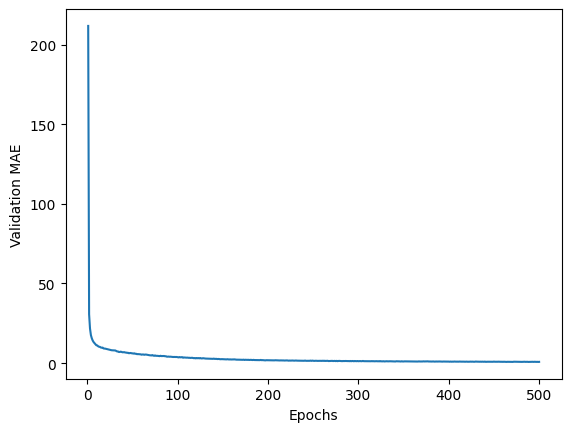

In [40]:
import matplotlib.pyplot as plt

#Plotting validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

It may be a little difficult to see the plot, due to scaling issues and relatively high variance.
Let’s do the following:
- Omit the first 10 data points, which are on a different scale than the rest of the curve.
- Replace each point with an exponential moving average of the previous points,
to obtain a smooth curve.

In [55]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[350:])
smooth_mae_history

[1.1141624748706818,
 1.1137844040989875,
 1.1086996062099932,
 1.1087567475587128,
 1.1054083526566623,
 1.0994690853746234,
 1.0938930063001662,
 1.0925962655442074,
 1.0918756942776247,
 1.088017191364831,
 1.0844281562040445,
 1.0869888124945937,
 1.0838659293725947,
 1.0767772886700802,
 1.0669481450510656,
 1.0602005551033589,
 1.0654407185113466,
 1.0611637331661017,
 1.0566723597898868,
 1.0551770123411526,
 1.0530929707797745,
 1.0598559984546045,
 1.0592386507077045,
 1.059457130707773,
 1.0571169696546843,
 1.05645571431195,
 1.0627042273939424,
 1.0578041243786311,
 1.0563154266686465,
 1.0497827049861455,
 1.0440633460971807,
 1.0424911765837455,
 1.0434583251402185,
 1.035803592925555,
 1.0285859898256835,
 1.0299143191153624,
 1.0261477824427023,
 1.0258711290100815,
 1.0231037567621115,
 1.0243141738086023,
 1.0207709658899078,
 1.0119795506082327,
 1.005077037651749,
 1.0052840636128886,
 1.0031634115536245,
 1.0040396058582572,
 1.0010176557919361,
 1.0002349086362998

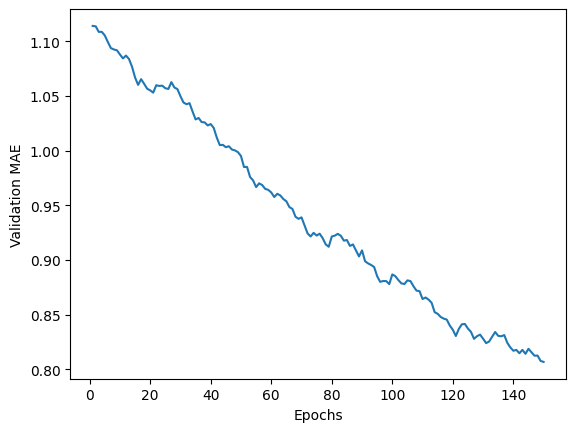

In [56]:
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [58]:
#Training the final model
model = build_model()
model.fit(train_data, train_targets,epochs=450, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(f"MAE Score on Test set:{val_mae}")
print(f"MSE Score on Test set:{val_mse}")


4/4 [==============================] - 0s 4ms/step - loss: 10.7972 - mae: 2.2313
MAE Score on Test set:2.521043300628662
MSE Score on Test set:12.47089672088623


In [59]:
test_pred = model.predict(test_data)
test_pred

array([[ 6.8082747],
       [18.73832  ],
       [20.666409 ],
       [27.305298 ],
       [24.841003 ],
       [24.410643 ],
       [30.060635 ],
       [22.090538 ],
       [18.569496 ],
       [20.099163 ],
       [26.659657 ],
       [17.556118 ],
       [16.138634 ],
       [45.630566 ],
       [23.11966  ],
       [21.597847 ],
       [24.47356  ],
       [18.03991  ],
       [20.535126 ],
       [20.083452 ],
       [ 9.485206 ],
       [10.297054 ],
       [21.315725 ],
       [14.469908 ],
       [19.22597  ],
       [25.74673  ],
       [27.86901  ],
       [31.849625 ],
       [10.928162 ],
       [19.978857 ],
       [18.601591 ],
       [14.059264 ],
       [32.551117 ],
       [24.006157 ],
       [22.984444 ],
       [ 8.473741 ],
       [15.5683155],
       [19.70594  ],
       [16.234987 ],
       [25.636911 ],
       [33.899277 ],
       [27.508213 ],
       [12.702172 ],
       [43.80049  ],
       [30.39888  ],
       [29.18143  ],
       [29.798471 ],
       [20.28

In [60]:
test_targets

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])